## **Video Game Success Analysis**

1. What is the relationship between a game's critical reception and its commercial success?

2. Do certain genres consistently outperform others in terms of global sales?

**Goal**

The goal of this project is to analyze the factors contributing to a video game's success. We'll identify which metrics, like critic and user scores, genre, and publisher, are most influential on a game's global sales. This analysis can offer valuable insights for game developers and publishers looking to make informed decisions about future projects.

**Setup**

It is always important to download important libraries for the analysis.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Loading the data**

In [4]:
# Load the data
df = pd.read_csv('videogame_rawdata.csv')
print("--- Initial Data ---")

print(f"Original shape: {df.shape}")

--- Initial Data ---
Original shape: (16719, 16)


**Quick view of the data**

In [5]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning

Checking for missing data

In [6]:
missing_values = df.isnull().sum()

print("Missing values in each column:")
print(missing_values[missing_values > 0])


Missing values in each column:
Name                  2
Year_of_Release     269
Genre                 2
Publisher            54
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64


**Dropping Duplicates**

In [7]:
duplicates_count = df.duplicated().sum()
print(f"Number of duplicate rows found: {duplicates_count}")
if duplicates_count > 0:
    df.drop_duplicates(inplace=True)
    print("Duplicate rows have been removed.")
    print(f"Shape after dropping duplicates: {df.shape}")

Number of duplicate rows found: 0


**Checking the data type of the columns again**

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB
None


**Changing the data type of columns**

In [9]:

df.dropna(subset=['Year_of_Release'], inplace=True)

df['Year_of_Release'] = df['Year_of_Release'].astype(int)
print("'Year_of_Release' data type changed to integer.")

'Year_of_Release' data type changed to integer.


I noticed 'User_Score' had 'tbd' values, which messes things up. Coercing it to numeric is an easy way to turn those into NaNs (blanks).

In [10]:
df['User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce')
print("'User_Score' data type changed to numeric.")

'User_Score' data type changed to numeric.


In [11]:
print("\n--- Checking Data Types (After Changes) ---")
print(df.dtypes)


--- Checking Data Types (After Changes) ---
Name                object
Platform            object
Year_of_Release      int64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer           object
Rating              object
dtype: object


**Ordering the data**

In [12]:
df_ordered = df.sort_values(by=['Year_of_Release', 'Name'], ascending=[True, True])
print("Data has been ordered by 'Year_of_Release' and 'Name'.")
print("Top 5 rows of the ordered data:")
print(df_ordered.head())

Data has been ordered by 'Year_of_Release' and 'Name'.
Top 5 rows of the ordered data:
           Name Platform  Year_of_Release     Genre   Publisher  NA_Sales  \
262   Asteroids     2600             1980   Shooter       Atari      4.00   
2650     Boxing     2600             1980  Fighting  Activision      0.72   
6301     Bridge     2600             1980      Misc  Activision      0.25   
6876   Checkers     2600             1980      Misc       Atari      0.22   
1968   Defender     2600             1980      Misc       Atari      0.99   

      EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
262       0.26       0.0         0.05          4.31           NaN   
2650      0.04       0.0         0.01          0.77           NaN   
6301      0.02       0.0         0.00          0.27           NaN   
6876      0.01       0.0         0.00          0.24           NaN   
1968      0.05       0.0         0.01          1.05           NaN   

      Critic_Count  User_Score  Use

**Checking for Outliers**

Generated a box plot to visualize outliers in sales data. As expected, top-selling games appear as outliers.


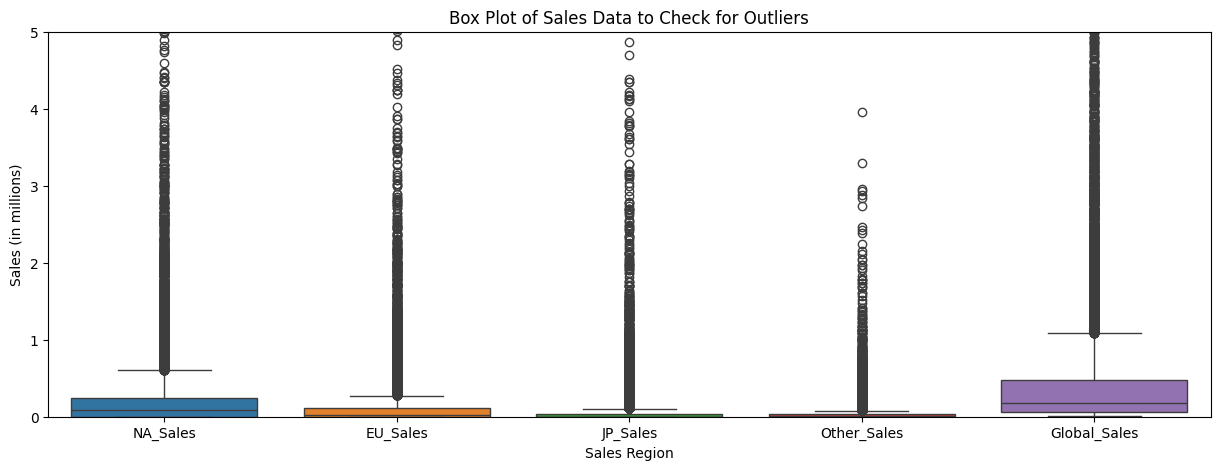

In [13]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df_ordered[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']])
plt.title('Box Plot of Sales Data to Check for Outliers')
plt.xlabel('Sales Region')
plt.ylabel('Sales (in millions)')
plt.ylim(0, 5) # Limiting the y-axis to see the boxplots clearly
plt.savefig('sales_outliers_boxplot.png')
print("Generated a box plot to visualize outliers in sales data. As expected, top-selling games appear as outliers.")

**Removing Outliers**

When checking for outliers, I noticed that the outliers weren't errors—they were the most successful, best-selling games like Wii Sports. My goal is to find out what makes a game successful, so removing my best examples of success would completely defeat the purpose. For that reason, I decided to keep these data points in the analysis, as they are the most important ones for answering my research questions.

Final Cleaned DataFrame is df_ordered

In [14]:
df_ordered.to_csv('cleaned_and_ordered_videogame_data.csv', index=False)

print(f"Final shape of the cleaned and ordered data: {df_ordered.shape}")
print("Saved the final cleaned and ordered data to 'cleaned_and_ordered_videogame_data.csv'.")

Final shape of the cleaned and ordered data: (16450, 16)
Saved the final cleaned and ordered data to 'cleaned_and_ordered_videogame_data.csv'.


## Data Exploration

Now that the data is cleaned and ordered, we can dive in and explore it to answer our key questions. We'll use visualizations to uncover patterns related to genres, publishers, and review scores.

In [15]:
sns.set_style("whitegrid")

**What are the most successful genres?**

/tmp/ipython-input-2746036220.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_sales.values, y=genre_sales.index, palette='viridis')


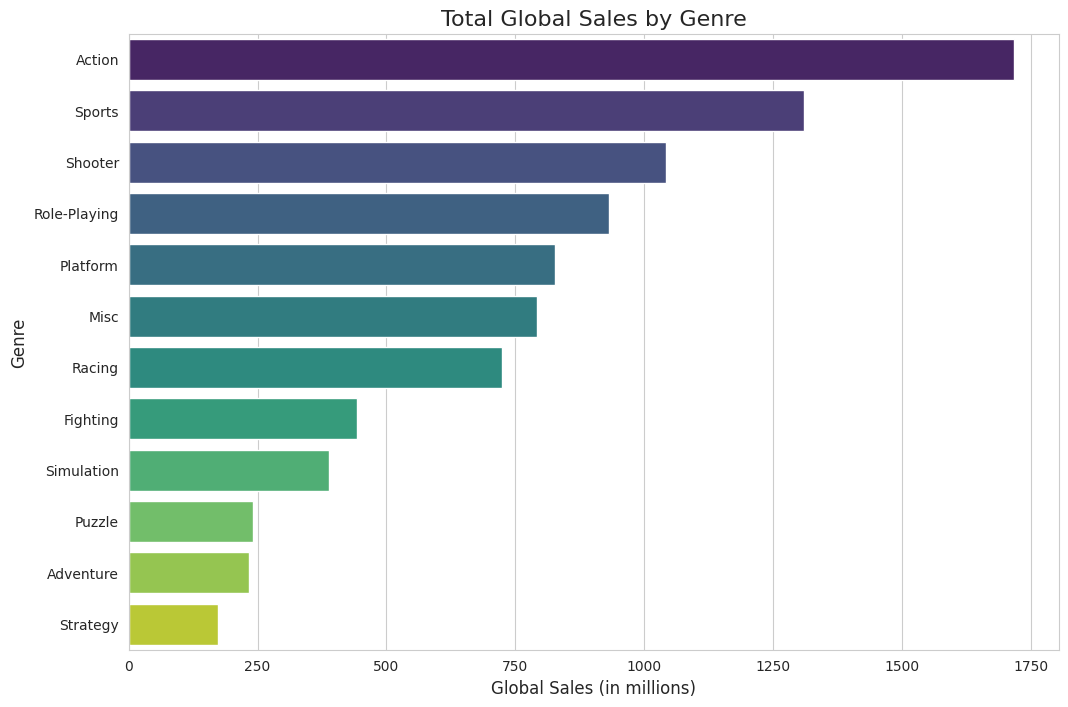

In [16]:
plt.figure(figsize=(12, 8))
genre_sales = df_ordered.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
sns.barplot(x=genre_sales.values, y=genre_sales.index, palette='viridis')
plt.title('Total Global Sales by Genre', fontsize=16)
plt.xlabel('Global Sales (in millions)', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.savefig('sales_by_genre.png')
plt.show()

**Which publishers are the most successful?**

I'm using `.head(10)` here because showing all the publishers would be a huge mess. This keeps the chart clean and focused on the biggest players.

/tmp/ipython-input-2598660972.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=publisher_sales.values, y=publisher_sales.index, palette='plasma')


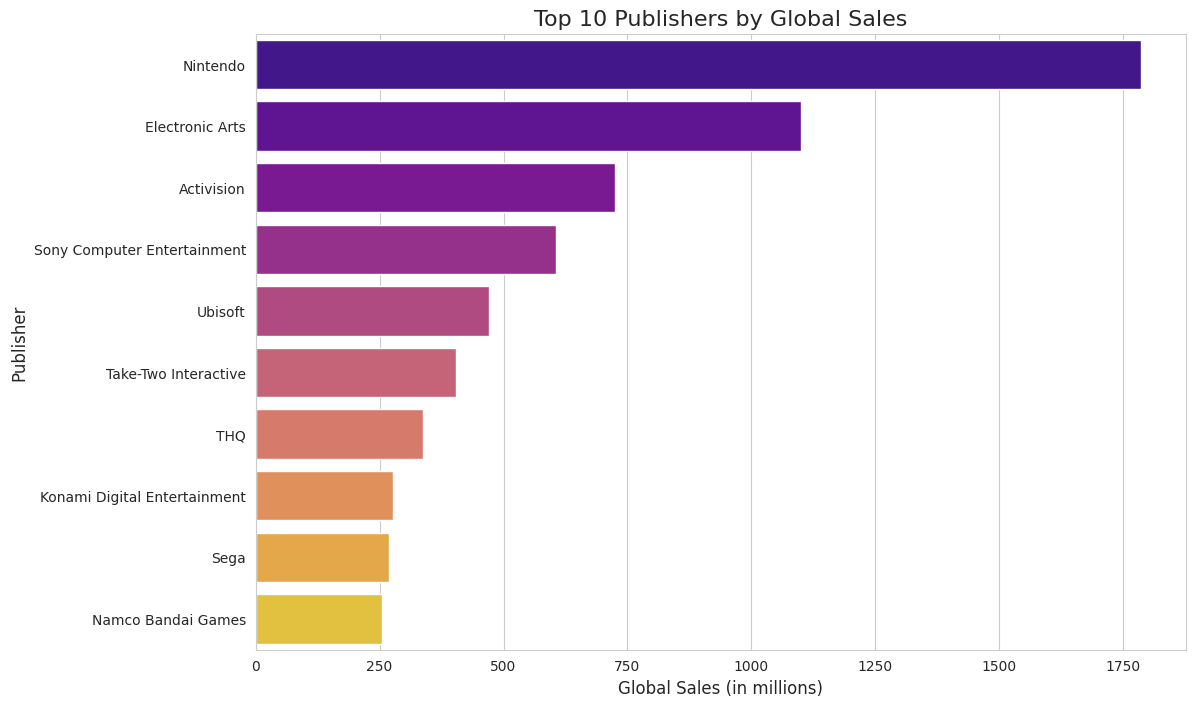

In [17]:
plt.figure(figsize=(12, 8))
publisher_sales = df_ordered.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=publisher_sales.values, y=publisher_sales.index, palette='plasma')
plt.title('Top 10 Publishers by Global Sales', fontsize=16)
plt.xlabel('Global Sales (in millions)', fontsize=12)
plt.ylabel('Publisher', fontsize=12)
plt.savefig('sales_by_publisher.png')
plt.show()

**What is the sales trend over the years?**

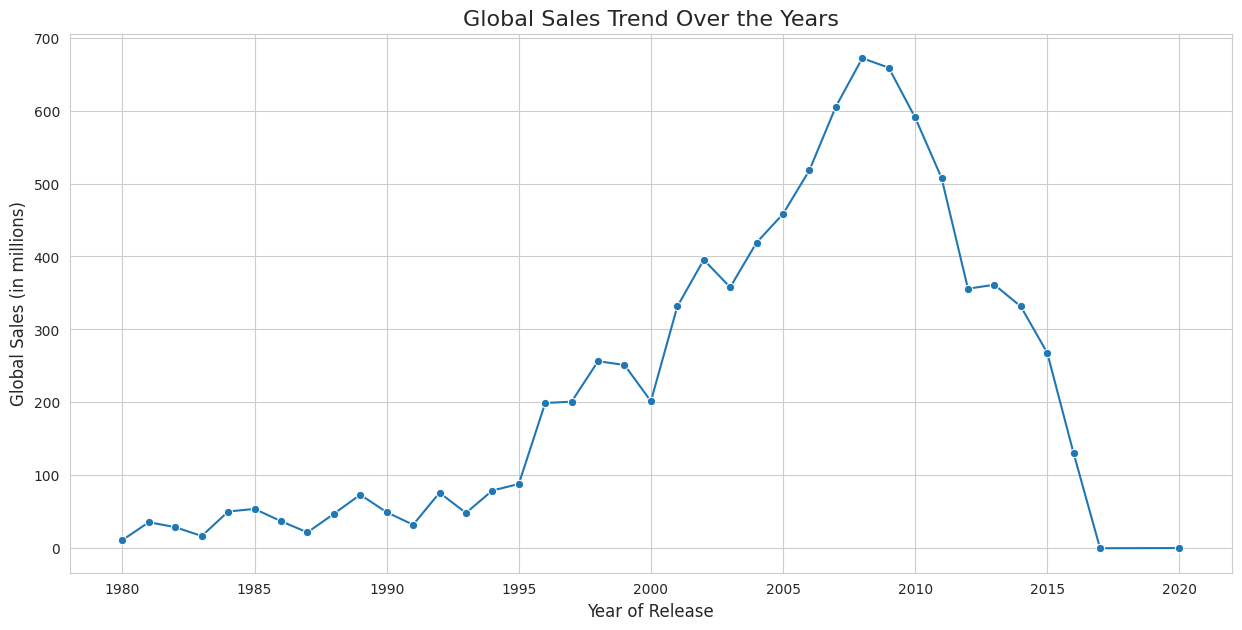

In [18]:
sales_by_year = df_ordered.groupby('Year_of_Release')['Global_Sales'].sum().reset_index()
plt.figure(figsize=(15, 7))
sns.lineplot(x='Year_of_Release', y='Global_Sales', data=sales_by_year, marker='o')
plt.title('Global Sales Trend Over the Years', fontsize=16)
plt.xlabel('Year of Release', fontsize=12)
plt.ylabel('Global Sales (in millions)', fontsize=12)
plt.grid(True)
plt.savefig('sales_trend_by_year.png')
plt.show()

**Do higher scores lead to higher sales?**

In [19]:
plt.figure(figsize=(16,7))

<Figure size 1600x700 with 0 Axes>

<Figure size 1600x700 with 0 Axes>

**Critic Score v.s. Sales**

(0.0, 15.0)

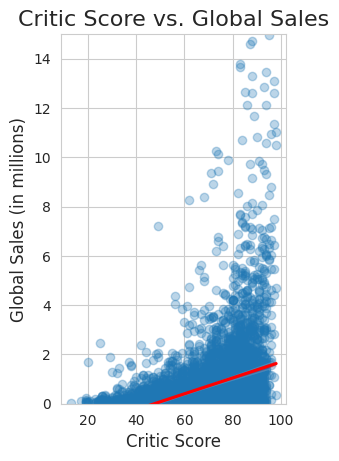

In [20]:
plt.subplot(1, 2, 1)
sns.regplot(x='Critic_Score', y='Global_Sales', data=df_ordered, scatter_kws={'alpha':0.3}, line_kws={'color': 'red'})
plt.title('Critic Score vs. Global Sales', fontsize=16)
plt.xlabel('Critic Score', fontsize=12)
plt.ylabel('Global Sales (in millions)', fontsize=12)
plt.ylim(0, 15) # Zoom in for a clearer view of the relationship


User Score v.s. Sales

(0.0, 15.0)

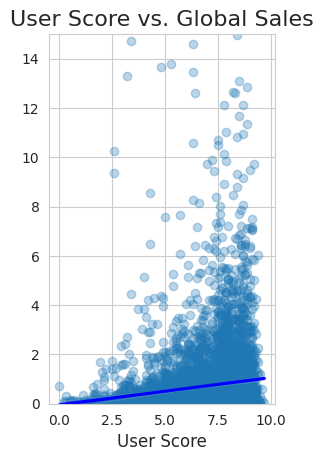

In [21]:
plt.subplot(1, 2, 2)
sns.regplot(x='User_Score', y='Global_Sales', data=df_ordered, scatter_kws={'alpha':0.3}, line_kws={'color': 'blue'})
plt.title('User Score vs. Global Sales', fontsize=16)
plt.xlabel('User Score', fontsize=12)
plt.ylabel('') # Hide y-label for cleaner look
plt.ylim(0, 15) # Zoom in for a clearer view


In [22]:
plt.suptitle('Relationship Between Review Scores and Global Sales', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('scores_vs_sales.png')
plt.show()

<Figure size 640x480 with 0 Axes>

## Conclusion

After analyzing the data, I was able to boil down the key factors for a successful game into three main points:

1. The Publisher is King: A game's success seems to be tied heavily to its publisher. Having a giant like Nintendo or EA in your corner gives a game a massive advantage, most likely due to their huge marketing budgets.

2. Genre is a Major Factor: Sticking to a popular genre is a safe bet. Action, Sports, and Shooter games consistently bring in the most money across the globe.

3. Good Reviews Help, But Don't Guarantee a Hit: While better critic scores do show a slight positive link to sales, it's not the game-changer I expected. It's clear that a powerful publisher and a popular genre are much more important for achieving massive sales.


